In [2]:
import pandas as pd
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
import ast
skills = ast.literal_eval(df['job_skills'][0]) if isinstance(df['job_skills'][0], str) else None
def clean_list(skills):
    if pd.notna(skills):

        return ast.literal_eval(skills)
    df['job_skills']=df['job_skills'].apply(clean_list)

c:\Users\Hassaan Yousaf\anaconda3\envs\pythonproj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df_exploded=df.explode('job_skills')
skill_count=df_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
skill_count=skill_count.sort_values(by='skill_count',ascending=False )
skill_count

,job_title_short,job_skills,skill_count
19078,Data Analyst,['excel'],8095
49382,Data Analyst,['sql'],4997
136380,Data Scientist,['python'],4659
35354,Data Analyst,"['sql', 'excel']",3020
1233,Business Analyst,['excel'],2443
...,...,...,...
12,Business Analyst,"['alteryx', 'tableau', 'power bi', 'excel']",1
13,Business Analyst,"['alteryx', 'tableau', 'power bi', 'looker']",1
14,Business Analyst,"['alteryx', 'tableau', 'qlik']",1
19,Business Analyst,"['angular', 'excel', 'tableau']",1


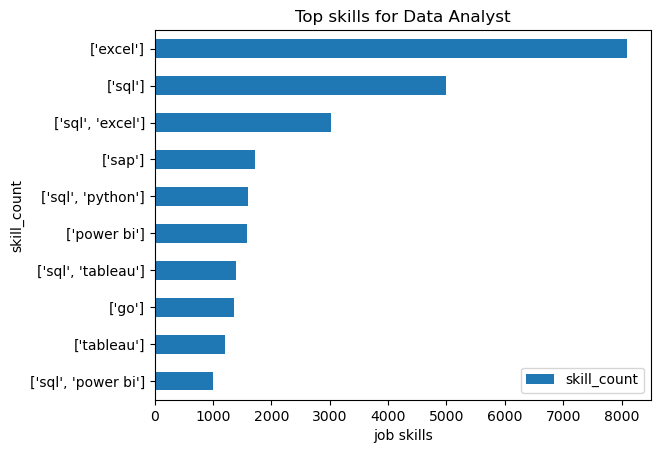

In [20]:
import matplotlib.pyplot as plt
job_title = "Data Analyst"
Total_skills = 10

df_skills = skill_count[skill_count["job_title_short"] == job_title].head(Total_skills)
df_skills.plot(kind="barh", x="job_skills", y="skill_count")
plt.title(f"Top skills for {job_title}")
plt.xlabel("job skills")
plt.ylabel("skill_count")
plt.gca().invert_yaxis()